In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, output_train),(x_test, ouput_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


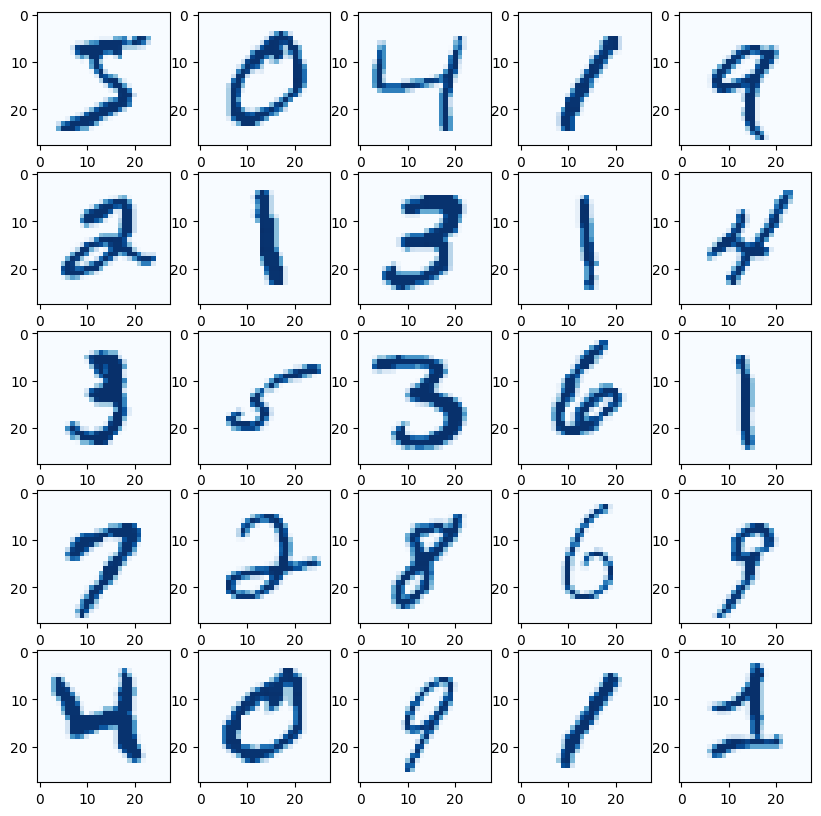

In [11]:
#exibindo figuras
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i], cmap="Blues")
    plt.grid(False)


In [6]:
# normalização dos dados
x_train = (x_train.astype("float32"))/255.0

x_test = (x_test.astype("float32"))/255.0


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


print("Tamanho dasa imagens no conjunto de treino: ", x_train.shape)
print(x_train.shape[0], "dados de treino")
print(x_test.shape[0], "dados de teste")

Tamanho dasa imagens no conjunto de treino:  (60000, 28, 28, 1)
60000 dados de treino
10000 dados de teste


In [14]:
# transformando os dados rotulados (output)
output_train = to_categorical(output_train, num_classes=10)
output_test = to_categorical(ouput_test, num_classes=10)



In [15]:
# modelo de rede neural

model = keras.Sequential(
    [
        keras.Input((28,28,1)), # Tamanho das imagens de entrada
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        # Camada 2
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(), # transformando a imagem em um vetor
        layers.Dense(10, activation="softmax")

    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
historico = model.fit(x_train, output_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.7978 - loss: 0.6710 - val_accuracy: 0.9765 - val_loss: 0.0813
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9743 - loss: 0.0871 - val_accuracy: 0.9822 - val_loss: 0.0658
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9819 - loss: 0.0608 - val_accuracy: 0.9860 - val_loss: 0.0531
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.9873 - val_loss: 0.0474
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9848 - val_loss: 0.0476
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9895 - loss: 0.0353 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9921 - loss: 0.0257 - 

In [18]:
model.save('modelo.keras')

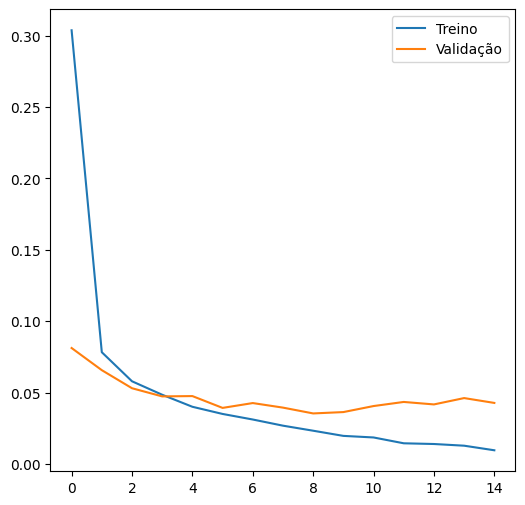

In [20]:
plt.figure(figsize=(6,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.show()